In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from mapmanagercore import MapAnnotations, MultiImageLoader, MMapLoader
import matplotlib.pyplot as plt

In [ ]:
# Create an image loader
loader = MultiImageLoader(
    lineSegments="../data/rr30a_s0u/line_segments.csv",
    points="../data/rr30a_s0u/points.csv")

# add image channels to the loader
loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch1.tif", channel=0)
loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch2.tif", channel=1)

# Create the annotation map
map = MapAnnotations(loader)

# save the annotation map
map.save("../data/rr30a_s0us.mmap")

In [2]:
# loading the map manager from zarr.
map = MapAnnotations(MMapLoader("../data/rr30a_s0us.mmap").cached())

In [18]:
id = map.addSpine(segmentId="1", x=1,y=2,z=3)
# map.moveAnchor(spineId=id, x=1, y=1, z=3)
# map.moveSpine(spineId=id, x=1, y=1, z=3)
# map.deleteSpine(id)
# map.undo()
# map.redo()
# map.updateSpine(spineId=id, value={
#   "f": 1,
# })
# map.undo()
# map.translateBackgroundRoi()
# map.deleteSegment("")


In [19]:
map.segments["segment"].get_coordinates(include_z=True)

,x,y,z
id,,,
0,354.0,240.0,31.000
0,359.0,240.0,31.000
0,363.0,236.0,31.000
0,391.0,236.0,31.000
0,395.0,232.0,31.000
...,...,...,...
4,241.0,479.0,28.222
4,242.0,487.0,28.111
4,245.0,492.0,28.000


In [4]:
map.segments["segmentLeft"].get_coordinates()
map.segments["segmentRight"].get_coordinates()

,x,y
segmentID,,
0,354.000000,236.000000
0,357.343146,236.000000
0,360.171573,233.171573
0,360.777719,232.674122
0,361.469266,232.304482
...,...,...
4,993.711790,242.719132
4,994.323018,242.368508
4,994.986289,242.130583


In [5]:
map["roi"].get_coordinates()

,x,y
spineID,,
0,432.0,229.0
0,432.0,228.0
0,435.0,226.0
0,430.0,220.0
0,429.0,221.0
...,...,...
138,165.0,326.0
138,154.0,329.0
138,156.0,337.0


In [6]:
map["roiBase"].get_coordinates()

,x,y
spineID,,
0,430.284988,228.989835
0,430.663610,228.944569
0,431.036201,228.863455
0,431.399375,228.747232
0,431.749832,228.596955
...,...,...
138,174.828427,325.171573
138,172.684806,323.027952
138,172.185444,320.531142


In [7]:
slices = map.slices(time=0, channel=0, zRange=(18, 36))

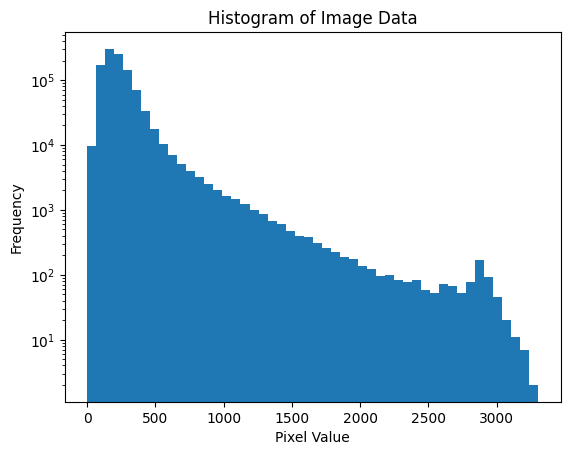

In [8]:
plt.hist(slices.data(), bins=50)
plt.yscale('log')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Image Data')
plt.show()

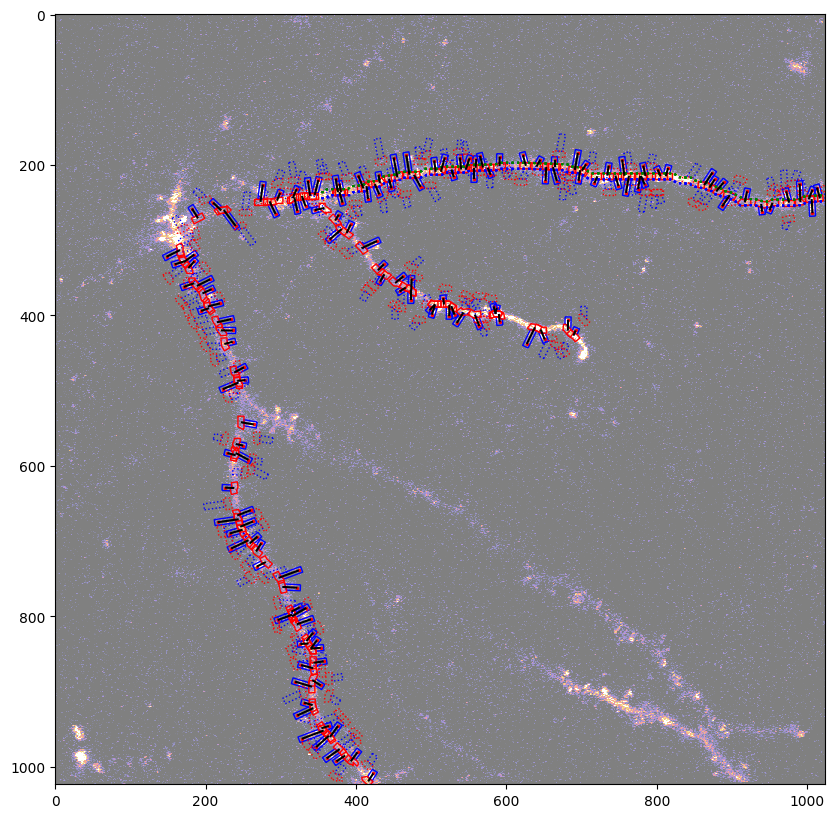

In [9]:

fig, ax = plt.subplots(figsize=(10, 10))

map.segments["segmentLeft"].plot(color='blue', linestyle='dotted', ax=ax)
map.segments["segmentRight"].plot(color='green', linestyle='dotted', ax=ax)

map["anchors"].plot(color='black', ax=ax)
map["points"].plot(color='red', marker='o', markersize=2, ax=ax)

map["roiHead"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
map["roiHeadBg"].plot(edgecolor='blue', linestyle='dotted', color=(0,0,0,0), ax=ax)

map["roiBase"].plot(edgecolor='red', color=(0,0,0,0), ax=ax)
map["roiBaseBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.5, cmap='CMRmap')

plt.show()

In [10]:
map["z"].between(10, 40)

spineID
0      True
1      True
2      True
3      True
4      True
       ... 
134    True
135    True
136    True
137    True
138    True
Name: z, Length: 139, dtype: bool

In [11]:
filtered = map[map["z"].between(10, 40)]

In [14]:
filtered[:]

,segmentID,x,y,z,anchorX,anchorY,spineLength,xBackgroundOffset,yBackgroundOffset,roiExtend,...,roi,roiBg,roiStats_ch1_sum,roiStats_ch1_max,roiStats_ch2_sum,roiStats_ch2_max,roiStatsBg_ch1_sum,roiStatsBg_ch1_max,roiStatsBg_ch2_sum,roiStatsBg_ch2_max
spineID,,,,,,,,,,,,,,,,,,,,,
0,0,431.0,239.0,31,425.0,31,14.86,21.0,0.0,4.0,...,"POLYGON ((432.000 229.000, 432.000 228.000, 43...","POLYGON ((453.000 229.000, 453.000 228.000, 45...",47011.0,649.0,73400.0,1255.0,47011.0,649.0,73400.0,1255.0
1,0,382.0,250.0,31,378.0,31,14.56,21.0,14.0,4.0,...,"POLYGON ((386.000 232.000, 370.000 232.000, 37...","POLYGON ((407.000 246.000, 391.000 246.000, 39...",13277.0,420.0,8074.0,193.0,13277.0,420.0,8074.0,193.0
2,0,416.0,245.0,31,414.0,31,17.12,21.0,14.0,4.0,...,"POLYGON ((421.000 230.000, 421.000 222.000, 41...","POLYGON ((442.000 244.000, 442.000 236.000, 43...",11966.0,471.0,4351.0,155.0,11966.0,471.0,4351.0,155.0
3,0,447.0,231.0,31,444.0,31,13.24,21.0,21.0,4.0,...,"POLYGON ((441.000 223.000, 444.000 236.000, 45...","POLYGON ((462.000 244.000, 465.000 257.000, 47...",17141.0,473.0,5302.0,161.0,17141.0,473.0,5302.0,161.0
4,0,486.0,229.0,31,477.0,31,18.36,21.0,14.0,4.0,...,"POLYGON ((485.000 216.000, 484.000 209.000, 48...","POLYGON ((506.000 230.000, 505.000 223.000, 50...",9419.0,309.0,3658.0,100.0,9419.0,309.0,3658.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,4,171.0,362.0,29,184.9,29,14.74,14.0,-21.0,4.0,...,"POLYGON ((178.000 355.000, 166.000 360.000, 16...","POLYGON ((192.000 334.000, 180.000 339.000, 18...",17268.0,471.0,7285.0,141.0,17268.0,471.0,7285.0,141.0
135,4,236.0,420.0,29,220.2,29,15.80,-21.0,21.0,4.0,...,"POLYGON ((214.000 417.000, 214.000 418.000, 21...","POLYGON ((193.000 438.000, 193.000 439.000, 19...",16283.0,486.0,6471.0,237.0,16283.0,486.0,6471.0,237.0
136,4,253.0,486.0,28,242.0,28,11.05,-14.0,21.0,4.0,...,"POLYGON ((238.000 488.000, 238.000 489.000, 23...","POLYGON ((224.000 509.000, 224.000 510.000, 22...",15995.0,472.0,7309.0,169.0,15995.0,472.0,7309.0,169.0


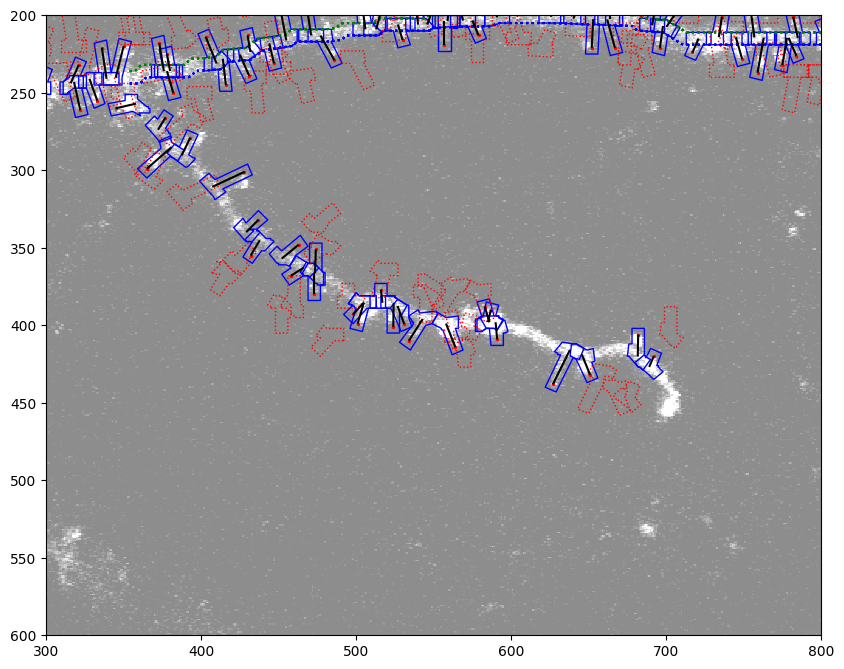

In [16]:
slices = filtered.slices(time=0, channel=0)

fig, ax = plt.subplots(figsize=(10, 10))

filtered.segments["segmentLeft"].plot(color='blue', linestyle='dotted', ax=ax)
filtered.segments["segmentRight"].plot(color='green', linestyle='dotted', ax=ax)

filtered["anchors"].plot(color='black', ax=ax)
filtered["points"].plot(color='red', marker='o', markersize=2, ax=ax)

filtered["roi"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
filtered["roiBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.45, cmap='gray')

# Set x and y limits
ax.set_xlim(300, 800)
ax.set_ylim(600, 200)

plt.show()

In [17]:
layers = filtered.getAnnotations(options={
    "selection": {
      "t": 0,
      "z": (18, 36)
    },
    "annotationSelections": {
      "segmentIDEditing": None,
      "segmentID": None,
      "spineID": None
    },
    "showLineSegments": True,
    "showAnchors": True,
    "showLabels": True,
    "showLineSegmentsRadius": True,
    "showSpines": True,
  },
)

for layer in layers:
    coords, props = layer.coordinates()
    print("Properties:", props, "\n coords:", coords.head(2), "\n\n")

Properties: {'id': 'segment-left', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': <function AnnotationsLayers._getSegments.<locals>.<lambda> at 0x13b91afc0>, 'strokeWidth': 0.5, 'offset': <function AnnotationsLayers._getSegments.<locals>.<lambda> at 0x13ac2f240>} 
 coords:              x      y
id                   
0   354.000000  232.0
0   355.686292  232.0 


Properties: {'id': 'segment-right', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': <function AnnotationsLayers._getSegments.<locals>.<lambda> at 0x13b91afc0>, 'strokeWidth': 0.5, 'offset': <function AnnotationsLayers._getSegments.<locals>.offset at 0x10517e980>} 
 coords:         x      y
id              
0   354.0  248.0
0   359.0  248.0 


Properties: {'id': 'segment-interaction', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': [0, 0, 0, 0], 'strokeWidth': <function AnnotationsLayers._getSegments.<locals>.<lambda> at 0x13f1062a0>, 'fixed': True} 
 coords:         x      y
id           